<a href="https://colab.research.google.com/github/mayurjadhav2002/Potato-Disease-Classification-app/blob/main/Potato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!git clone https://github.com/mayurjadhav2002/Potato-Disease-Classification-app/

Cloning into 'Potato-Disease-Classification-app'...
remote: Enumerating objects: 2161, done.
remote: Counting objects: 100% (2161/2161), done.
remote: Compressing objects: 100% (2159/2159), done.
remote: Total 2161 (delta 0), reused 2158 (delta 0), pack-reused 0
Receiving objects: 100% (2161/2161), 37.36 MiB | 18.08 MiB/s, done.


In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Potato-Disease-Classification-app/Data",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset) #len of dataset is 68 because every element in dataset is the batch of 32

68

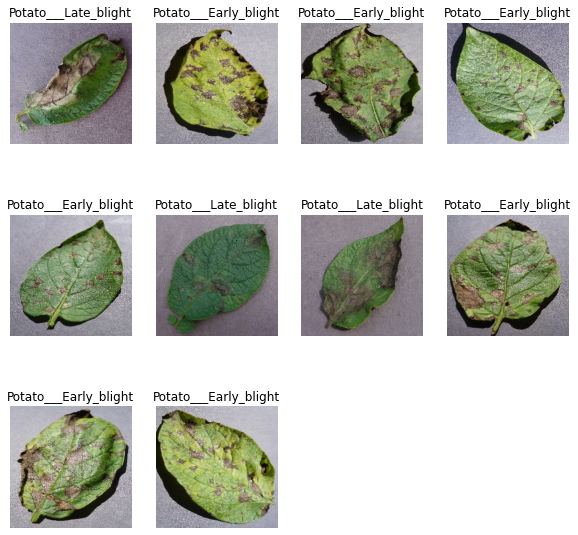

In [7]:
for image_batch, label_batch in dataset.take(1):
  # print(image_batch.shape)
  # print(label_batch.numpy())
  plt.figure(figsize=(10,10))
  for i in range(10):

    plt.subplot(3, 4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [8]:
# Train Test Split
# 80% Training and 20% Test
# 20% -> 10% validation and 10% test

In [9]:
train_size = 0.8
data_lenght = len(dataset)

In [10]:
train_ds = dataset.take(int(train_size*data_lenght))
#$ len(traint_ds)
#>> 54

In [11]:
test_ds = dataset.skip(len(train_ds))
len(test_ds)

14

In [12]:
val_size = 0.1
val_ds = test_ds.take(int(val_size*data_lenght))

In [13]:
test_ds = test_ds.skip(len(val_ds))
len(test_ds)

8

In [14]:
def get_dataset(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle=True, shuffle_size=10000):
  ds_size = len(ds)
  if(shuffle):
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split *ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds,val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [16]:
len(train_ds)
len(val_ds)
len(test_ds)

8

In [17]:
# improve the Performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) #keep the data in memory

In [18]:
# improve the Performance
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) #keep the data in memory

In [19]:
# improve the Performance
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) #keep the data in memory

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)

])

In [22]:
# CNN 
CHANNELS = 3
n_classes = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', 
                    input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [25]:
history = model.fit(train_ds,epochs=50, batch_size=BATCH_SIZE, verbose=1, validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 23s 120ms/step - loss: 0.9111 - accuracy: 0.4491 - val_loss: 0.8200 - val_accuracy: 0.6615
Epoch 2/50
54/54 [==============================] - 4s 83ms/step - loss: 0.7103 - accuracy: 0.6719 - val_loss: 0.5477 - val_accuracy: 0.7188
Epoch 3/50
54/54 [==============================] - 4s 72ms/step - loss: 0.4365 - accuracy: 0.8189 - val_loss: 0.2832 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 4s 72ms/step - loss: 0.2693 - accuracy: 0.8953 - val_loss: 0.1435 - val_accuracy: 0.9375
Epoch 5/50
54/54 [==============================] - 4s 79ms/step - loss: 0.2315 - accuracy: 0.9091 - val_loss: 0.1711 - val_accuracy: 0.9479
Epoch 6/50
54/54 [==============================] - 5s 84ms/step - loss: 0.1773 - accuracy: 0.9387 - val_loss: 0.1457 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 4s 83ms/step - loss: 0.1489 - accuracy: 0.9421 - val_loss: 0.2618 - val_accuracy: 0.9167
Epoch 8/50


In [26]:
scores = model.evaluate(test_ds)
scores

8/8 [==============================] - 3s 32ms/step - loss: 0.0149 - accuracy: 0.9961


[0.014898672699928284, 0.99609375]

In [27]:
history
history.params
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

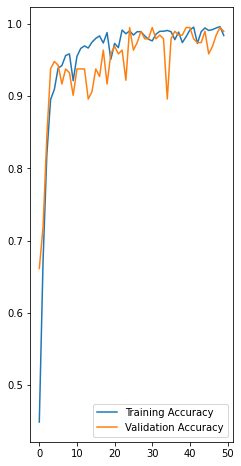

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50), accuracy, label="Training Accuracy")
plt.plot(range(50), val_accuracy, label="Validation Accuracy")
plt.legend(loc='lower right')

Fist Image to predict
Actual Label:  Potato___Late_blight
Predicted Label:  Potato___Late_blight


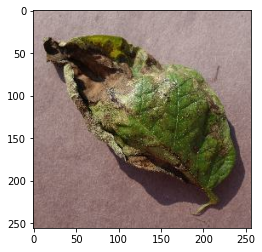

In [39]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype("uint8")
  first_label = labels_batch[0]
  print("Fist Image to predict")
  plt.imshow(first_image)
  print("Actual Label: ", class_names[first_label])
  batch_prediction = model.predict(image_batch)
  print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [40]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])), 2)
  return predicted_class, confidence

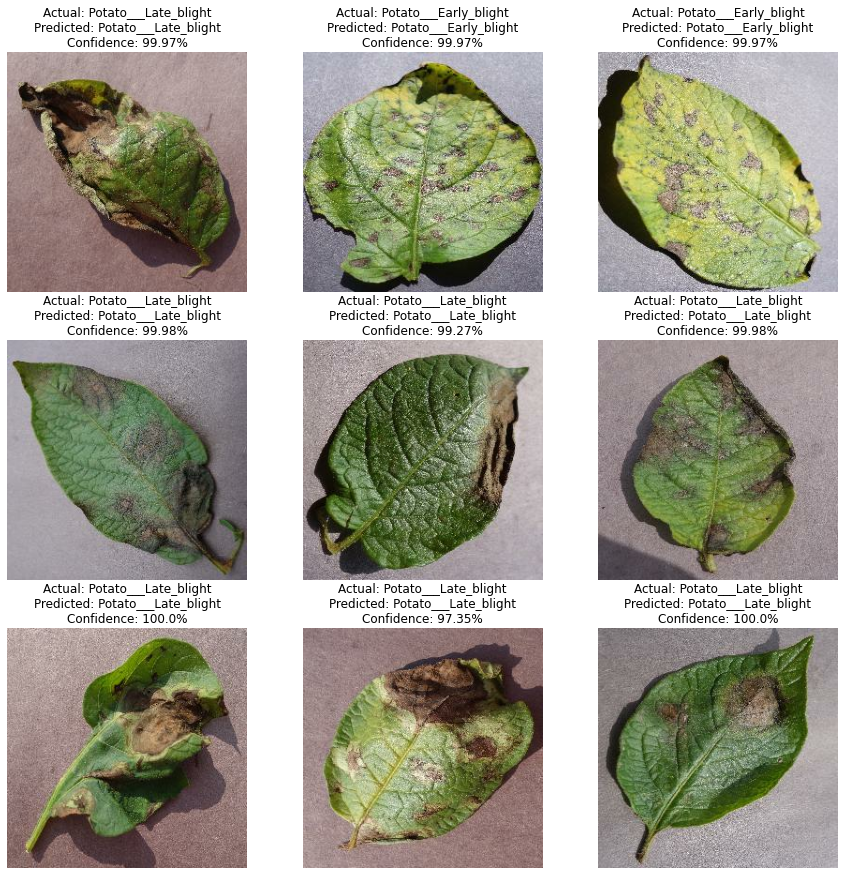

In [45]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis("off")

In [47]:
model.version = "v1.0.0"
model.save(f"/content/{model.version}")